<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Analysis of Housing Data
The following analysis focuses on the correlation between various features of the housing dataset. We will explore key insights using different statistical techniques.

In [12]:
# print a summary of the dataset
boston_df.describe()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Observations:

**CRIM (Per Capita Crime Rate by Town):**
- **Mean**: 3.61
- **Range**: 0.0063 to 88.9762
- **Observation**: The crime rates in these towns exhibit a breathtaking range, stretching from a tranquil 0.0063 to a staggering 88.9762. This vast disparity paints a picture of diverse neighborhoods, from serene suburban enclaves with negligible crime to bustling urban centers grappling with significant safety challenges. The mean crime rate of 3.61 serves as a central figure, but it's the wide range that tells a story of varied living experiences.

**ZN (Proportion of Residential Land Zoned for Large Lots):**
- **Mean**: 11.36
- **Range**: 0 to 100
- **Observation**: The zoning patterns across these towns reveal a fascinating landscape of urban planning. While some areas have no zoning for large residential lots, others are exclusively designed for spacious living with 100% of the land zoned for such purposes. The mean value of 11.36 indicates that, on average, there is a modest allocation for large lots, but the extremes highlight both densely populated zones and more expansive, upscale neighborhoods.

**INDUS (Proportion of Non-Retail Business Acres):**
- **Mean**: 11.14
- **Range**: 0.46 to 27.74
- **Observation**: Industrialization levels vary considerably among these towns, with the proportion of non-retail business acres ranging from a minimal 0.46 to a significant 27.74. The mean of 11.14 suggests a balanced presence of industrial activity, contributing to the economic fabric of these communities. This diversity indicates that some areas are more residential, while others are hubs of industry and commerce, driving local employment and infrastructure development.

**CHAS (Proximity to Charles River):**
- **Mean**: 0.069
- **Range**: 0 to 1
- **Observation**: The proximity to the picturesque Charles River is a rare luxury, with only a small fraction (mean of 0.069) of properties enjoying this scenic advantage. The binary nature of this variable (0 or 1) shows a clear divide between those fortunate to reside near the river's edge and those who are not. This proximity likely influences property values and the overall desirability of these locations, adding a unique charm to the selected few.

**NOX (Nitric Oxide Concentration):**
- **Mean**: 0.555
- **Range**: 0.385 to 0.871
- **Observation**: The levels of nitric oxide, a telltale marker of air quality, exhibit a range from a relatively clean 0.385 to a more concerning 0.871. The mean concentration of 0.555 suggests a moderate level of pollution across the dataset, reflecting varying degrees of industrial activity and vehicular emissions. This data underscores the environmental challenges and health implications faced by different communities within the region.

**RM (Average Number of Rooms per Dwelling):**
- **Mean**: 6.28
- **Range**: 3.561 to 8.78
- **Observation**: Homes in these towns offer a comfortable living space, with the average number of rooms per dwelling at 6.28. The range, from 3.561 to 8.78 rooms, highlights a mix of cozy cottages and more spacious abodes. This diversity in home sizes caters to a wide spectrum of family needs and preferences, reflecting both modest living conditions and more luxurious accommodations.

**AGE (Proportion of Owner-Occupied Units Built Before 1940):**
- **Mean**: 68.57
- **Range**: 2.9 to 100
- **Observation**: The age of homes tells a rich historical narrative, with an average of 68.57% of units built before 1940. The range from 2.9% to a full 100% indicates areas with a mix of both newer developments and well-preserved historic districts. These older homes, often exuding charm and character, stand as testaments to the architectural heritage and longevity of these communities.

**DIS (Weighted Distances to Employment Centers):**
- **Mean**: 3.80
- **Range**: 1.1296 to 12.1265
- **Observation**: The distance to employment centers varies widely, with a mean of 3.80 units. This range, from 1.1296 to 12.1265, suggests that some residents enjoy the convenience of nearby job opportunities, while others face longer commutes. This disparity impacts daily life, influencing everything from transportation choices to work-life balance and overall quality of living.

**RAD (Index of Accessibility to Radial Highways):**
- **Mean**: 9.55
- **Range**: 1 to 24
- **Observation**: Accessibility to major highways is a significant factor in these towns, with an average index value of 9.55. The range from 1 to 24 highlights areas with excellent connectivity to road networks, facilitating easy travel and commuting. This accessibility likely plays a crucial role in real estate values, economic activities, and the overall mobility of residents.

**TAX (Full-Value Property Tax Rate):**
- **Mean**: 408.24
- **Range**: 187 to 711
- **Observation**: Property tax rates vary greatly, with an average rate of 408.24. The range from 187 to 711 underscores the financial obligations homeowners face, impacting affordability and budget planning. These taxes fund essential public services and infrastructure, reflecting the investment each community makes in its future growth and development.

**PTRATIO (Pupil to Teacher Ratio):**
- **Mean**: 18.46
- **Range**: 12.6 to 22
- **Observation**: Education quality, as indicated by the pupil to teacher ratio, shows a mean of 18.46, with values ranging from 12.6 to 22. This ratio influences the learning environment, with lower ratios typically offering more personalized attention to students. The variation highlights the differing levels of educational resources and support available across these towns.

**LSTAT (Percentage of Lower Status of the Population):**
- **Mean**: 12.65
- **Range**: 1.73 to 37.97
- **Observation**: The socioeconomic status of the population varies, with an average of 12.65% identified as lower status. The range from 1.73% to 37.97% reflects the economic diversity within the dataset, highlighting areas with both affluence and significant socioeconomic challenges. These figures provide insight into the disparities and inequalities present in the region.

**MEDV (Median Value of Owner-Occupied Homes):**
- **Mean**: 22.53
- **Range**: 5 to 50
- **Observation**: The median value of owner-occupied homes spans a wide range, from $5,000 to $50,000, with a mean of $22,532. This variation underscores the diverse housing market, catering to different economic strata. The median values reflect not only the quality and amenities of the homes but also the desirability of the locations and the economic well-being of the residents.


In [13]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

##### As we can see no missing data: the **data set is clean**.

### Data Visualization

#### Histogram for each feature

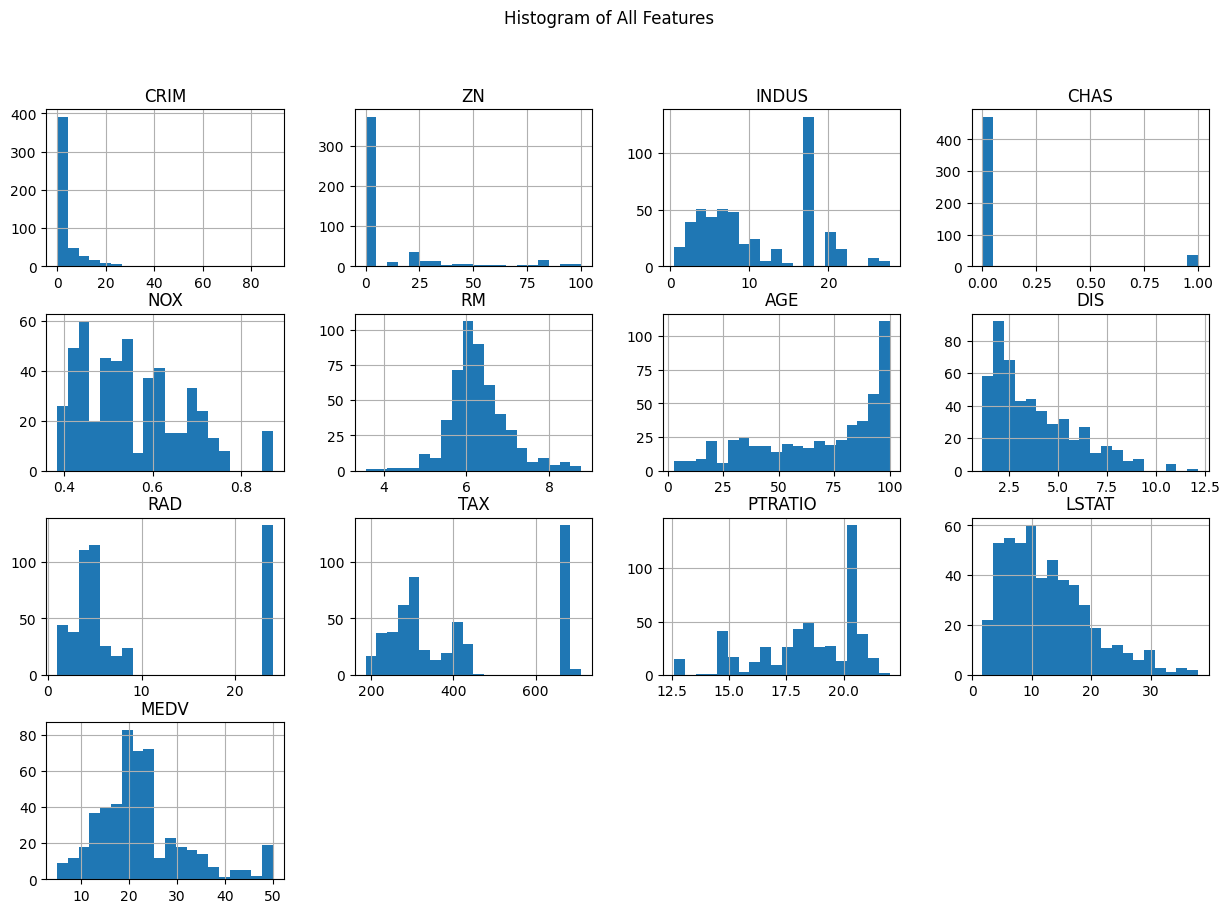

In [47]:
# Exclude the first column
boston_df_excluded = boston_df.iloc[:, 1:]  # Select all columns except the first one

# Plot the histogram of all features except the first column, whic is an index and, as such, not relevant
boston_df_excluded.hist(bins=20, figsize=(15, 10))
pyplot.suptitle('Histogram of All Features')
pyplot.show()

## Observations from the Histogram of All Features:

**CRIM (Per Capita Crime Rate by Town):**
- **Distribution**: Highly right-skewed with most values between 0 and 10, and extreme outliers exceeding 50.
- **Insight**: Significant variance in crime rates, highlighting areas with very high crime levels.

**ZN (Proportion of Residential Land Zoned for Lots Over 25,000 sq. ft.):**
- **Distribution**: Predominantly right-skewed, with the majority of values at 0.
- **Insight**: Indicates that large residential lots are uncommon, focusing urban development on smaller lot sizes.

**RM (Average Number of Rooms per Dwelling):**
- **Distribution**: Approximately normal with a mean around 6.
- **Insight**: Consistent average number of rooms, suggesting standard housing sizes in the dataset.

**AGE (Proportion of Owner-Occupied Units Built Before 1940):**
- **Distribution**: Bimodal, with peaks around 20 and 100.
- **Insight**: Indicates two distinct groups of housing ages, representing both newer and much older homes.

**TAX (Full-Value Property Tax Rate per $10,000):**
- **Distribution**: Broad range with a concentration around the lower values and a long tail.
- **Insight**: Wide variation in property tax rates, reflecting diverse fiscal policies across different areas.

**PTRATIO (Pupil-Teacher Ratio by Town):**
- **Distribution**: Right-skewed with a peak around 20.
- **Insight**: Suggests that most schools operate within an optimal pupil-teacher ratio, with some exceptions at higher ratios.

**LSTAT (Percentage of Lower Status of the Population):**
- **Distribution**: Right-skewed, with most values clustered at the lower end.
- **Insight**: Concentration of lower-status populations in certain areas, reflecting socioeconomic disparities.

**MEDV (Median Value of Owner-Occupied Homes in $1000s):**
- **Distribution**: Right-skewed with a peak around 20 and a significant number of homes at the maximum value of 50.
- **Insight**: Indicates a concentration of homes at the lower end of the value spectrum, with a notable number of high-value outliers.


#### Boxplot to see the distribution and outliers

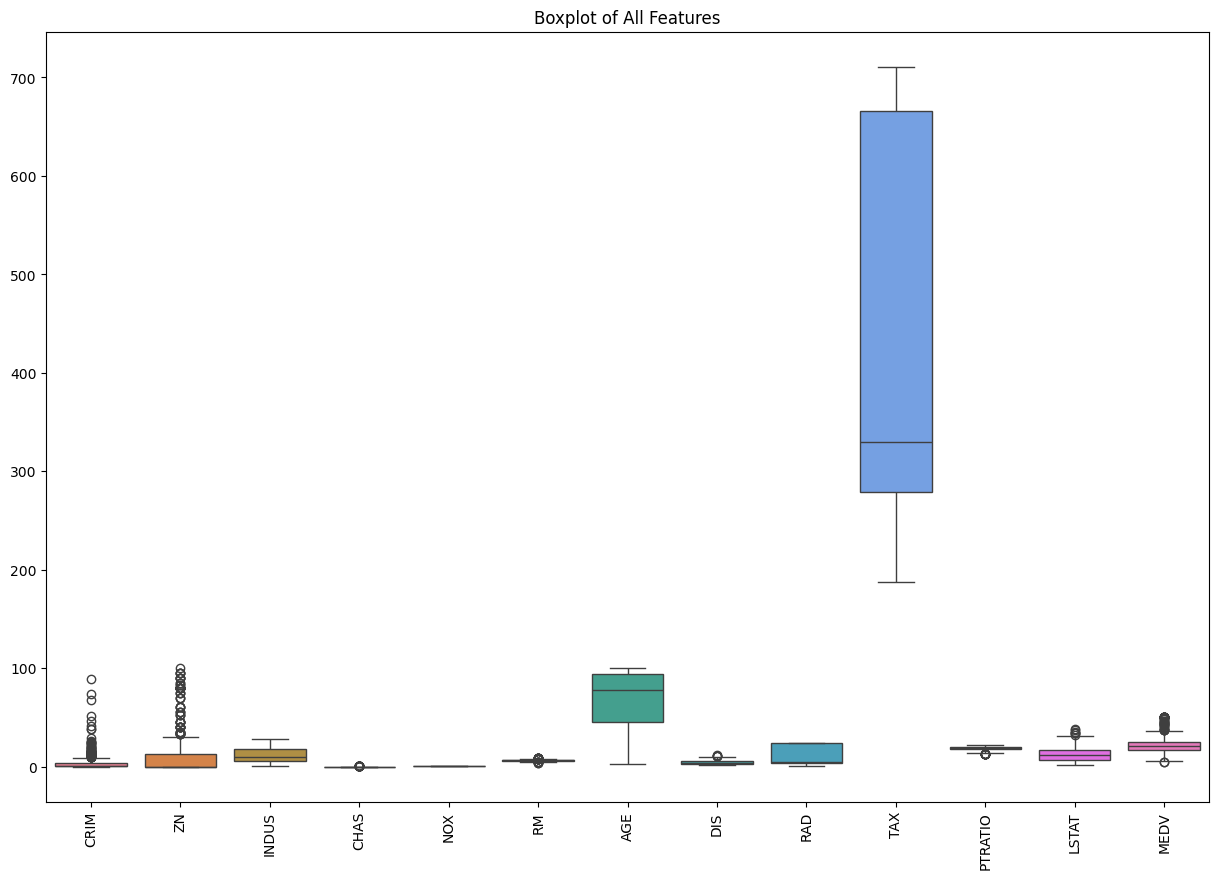

In [14]:
pyplot.figure(figsize=(15, 10))
sns.boxplot(data=boston_df_excluded)
pyplot.title('Boxplot of All Features')
pyplot.xticks(rotation=90)
pyplot.show()

## Observations from the Boxplot of All Features:

**CRIM (Per Capita Crime Rate by Town):**
- **Distribution**: The median is close to zero, indicating low crime rates in many areas, but with significant outliers extending up to around 90. This highlights areas with exceptionally high crime rates that deviate substantially from the norm.

**ZN (Proportion of Residential Land Zoned for Lots):**
- **Distribution**: The median is zero, with several outliers reaching up to 100. This suggests that large residential lots are uncommon, and zoning for such lots is limited to specific areas.

**RM (Average Number of Rooms per Dwelling):**
- **Distribution**: The median is approximately 6, with values ranging from about 3 to 9. This indicates a consistent housing structure across most properties, with the majority having between 5 to 7 rooms.

**AGE (Proportion of Owner-Occupied Units Built Before 1940):**
- **Distribution**: The median is around 80, with the range extending from nearly 0 to 100. This shows a mix of relatively new and very old housing stocks, reflecting a diverse age distribution of homes.

**TAX (Full-Value Property Tax Rate per $10,000):**
- **Distribution**: The median is around 300, with a range from 200 to 700. This indicates variability in property tax rates, reflecting different fiscal policies or property values across towns.

These boxplots provide a clear overview of the distribution and variability of each feature, highlighting key outliers and the general spread of the data. This is essential for understanding the characteristics and anomalies within the dataset, aiding further analysis and decision-making.


#### Correlation Matrix

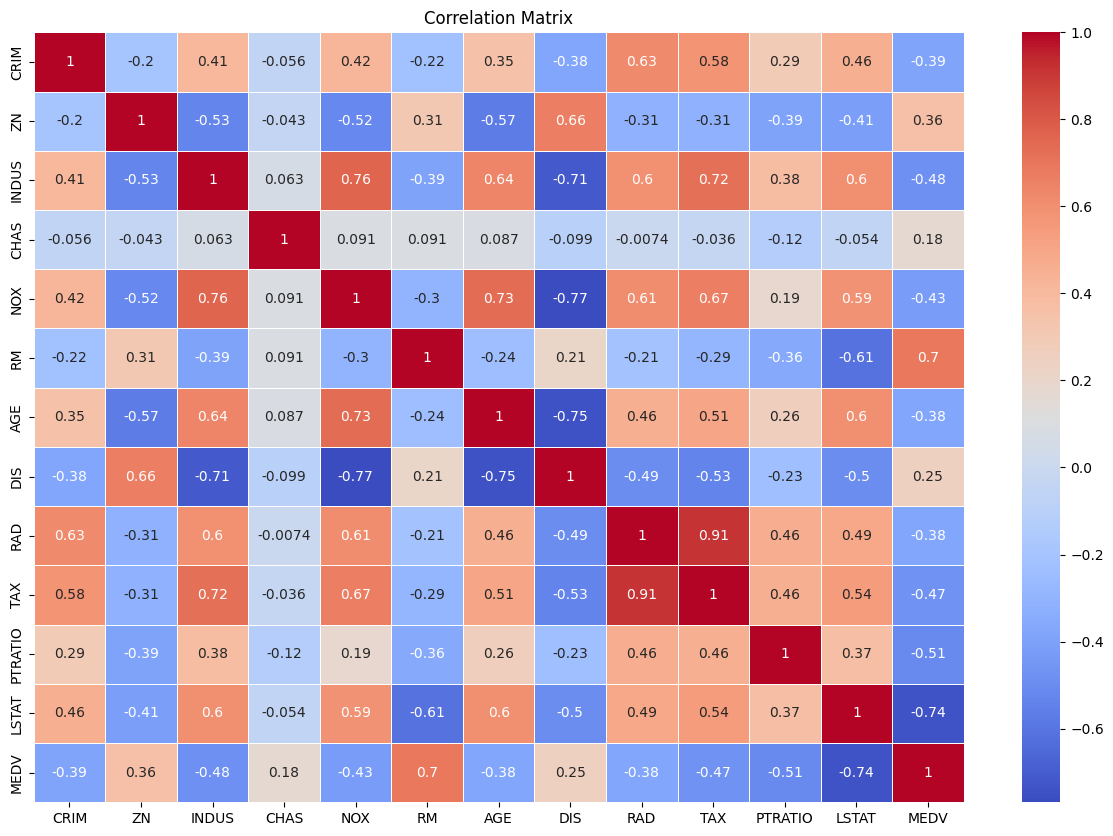

In [15]:
pyplot.figure(figsize=(15, 10))
# exclude the index column
correlation_matrix = boston_df_excluded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
pyplot.title('Correlation Matrix')
pyplot.show()

## Observations from the Correlation Matrix:

### Strong Positive Correlations:
- **INDUS and NOX**: Indicates a strong relationship between industrial land use and higher nitric oxide concentrations, highlighting the environmental impact of industrial activities.
- **RAD and TAX**: Shows a very strong correlation between accessibility to highways and property tax rates, suggesting that areas with better road access tend to have higher property taxes.
- **INDUS and TAX**: Reflects a strong link between industrial activity and property taxes, potentially due to higher assessed values in industrial zones.
- **NOX and AGE**: Suggests older homes are often located in areas with higher pollution levels.
- **RM and MEDV**: Indicates a positive correlation between the number of rooms per dwelling and the median home value, suggesting larger homes tend to be more valuable.

### Strong Negative Correlations:
- **DIS and NOX**: Indicates that homes farther from employment centers tend to be in less polluted areas.
- **DIS and INDUS**: Shows that areas farther from employment centers have less industrial activity.
- **LSTAT and MEDV**: Reflects a strong negative correlation between the percentage of lower-status population and median home value, indicating socio-economic disparities.
- **RM and LSTAT**: Suggests that homes with more rooms tend to be in higher-status areas.
- **DIS and AGE**: Indicates that older homes are generally closer to employment centers.

### Moderate Positive Correlations:
- **CRIM and RAD**: Suggests a moderate correlation between crime rates and highway access.
- **CRIM and TAX**: Indicates a link between higher crime rates and higher property taxes.
- **INDUS and AGE**: Reflects a moderate correlation between industrial activity and the age of homes.
- **NOX and TAX**: Suggests higher pollution levels are associated with higher property taxes.
- **PTRATIO and LSTAT**: Indicates a moderate positive relationship between pupil-teacher ratio and the percentage of lower-status population.

### Moderate Negative Correlations:
- **ZN and INDUS**: Indicates that residential zoning decreases with industrial land use.
- **ZN and NOX**: Suggests residentially zoned areas have lower pollution levels.
- **ZN and AGE**: Reflects that newer homes are more likely in residentially zoned areas.
- **ZN and DIS**: Indicates residential areas are typically farther from employment centers.
- **RM and LSTAT**: Larger homes are in higher-status areas.
- **PTRATIO and MEDV**: Higher pupil-teacher ratios are linked with lower median home values.

### Weak or No Correlations:
- **CHAS**: Shows weak correlations with most features, suggesting proximity to the Charles River has a limited impact on other variables.
- **AGE and MEDV**: A weak positive correlation, indicating a slight tendency for older homes to have higher values.
- **DIS and MEDV**: Weak negative correlation, suggesting a minor relationship between distance to employment centers and home values.


## Boxplot of Median Value of Owner-Occupied Homes

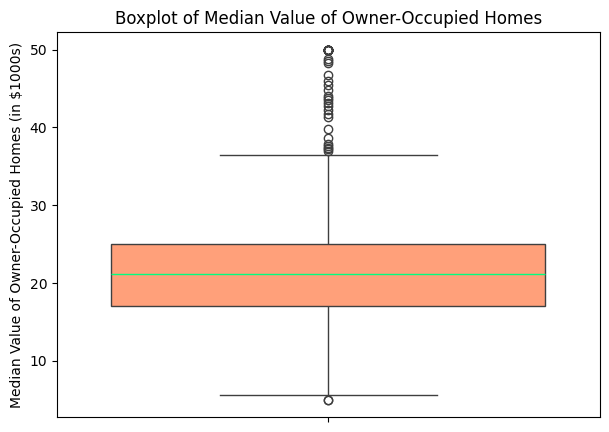

In [24]:
# Boxplot for the Median value of owner-occupied homes
#  This boxplot will show the distribution of the median value of owner-occupied homes (MEDV). 
#  It will help identify any outliers and understand the spread and central tendency of the values.
pyplot.figure(figsize=(7, 5))
sns.boxplot(y=boston_df['MEDV'], patch_artist=True, 
                  boxprops=dict(facecolor='lightsalmon'),
                  medianprops=dict(color='springgreen'))
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
pyplot.show()

## Descriptive Statistics for MEDV (Median House Value)

The descriptive statistics for the MEDV (median house value) variable offer a comprehensive view of the distribution of house values within the dataset:

- **Central Value**: The median home value is approximately \$21,000, representing the middle of the housing market.
- **Interquartile Range (IQR)**: The IQR spans from about \$17,000 \to \$25,000, indicating where the middle 50\% of home values lie.
- **Whiskers**: The whiskers extend from around \$10,000  \to  \$35,000, showing the overall range of home values, excluding outliers.
- **Outliers**: Notable outliers include homes valued up to 50,000, and a few below 10,000, reflecting significant variations in the market.

- **Count**: The dataset includes 505 observations, representing the number of house records with available MEDV values.

- **Mean (Average)**: The average median house value is approximately $22,530. This figure reflects the central tendency of house values across all observations.

- **Standard Deviation (std)**: The standard deviation of about $9,210 highlights the variability or dispersion of house values around the mean. A significant portion relative to the mean, this indicates considerable variance in house values.

- **Minimum (min)**: The lowest recorded median house value is $5,000, demonstrating the lower bound of house values in the dataset.

- **25th Percentile (25%)**: At the first quartile, the 25th percentile is 17,000, indicating that 25\% of the houses have median values of $17,000 or less.

- **Median (50%)**: The median house value, or the 50th percentile, is \$21,200. As a robust measure of central tendency, the median being lower than the mean suggests a right-skewed distribution of house values.

- **75th Percentile (75%)**: The third quartile is 25,000, meaning that 75\% of the houses have median values of $25,000 or less.

- **Maximum (max)**: The highest recorded median house value is $50,000, marking the upper extreme of house values in the dataset.

### Summary

These statistics illustrate a broad spectrum of median house values, ranging from \$5,000 \to \$50,000. Most houses are clustered around the $22,500 mark, with the distribution skewed to the right, indicating the presence of higher-value outliers. The substantial standard deviation underscores the diverse range of house values represented in the dataset.
The distribution leans toward a right-skew, evidenced by the mean surpassing the median, and the presence of houses with notably high values relative to the overall data. The considerable standard deviation highlights the extensive variation in house values contained within the dataset.

## Bar plot for the Charles River variable

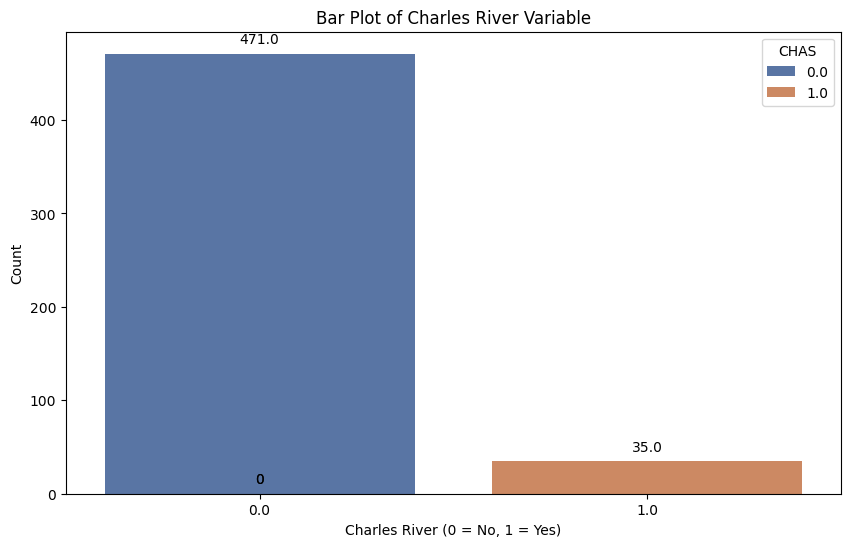

In [32]:
# Bar plot for the Charles River variable
#  This bar plot shows the count of properties next to the Charles River (CHAS = 1) versus those that are not (CHAS = 0). 
#  This helps us understand how many properties in the dataset are located near the river.
pyplot.figure(figsize=(10, 6))

# Define a color palette 
palette = sns.color_palette("deep", 2)  # Assuming there are 2 unique values in 'CHAS'

# Create the countplot
ax = sns.countplot(x=boston_df['CHAS'], hue=boston_df['CHAS'], palette=palette)

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Customize the plot
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (0 = No, 1 = Yes)')
pyplot.ylabel('Count')

# Show the plot
manager = pyplot.get_current_fig_manager()
manager.set_window_title('Bar Plot of Charles River Variable')
pyplot.show()

#### Observations 

- **Dominant Urban Spread**: Over 400 properties (471) are not near the Charles River, indicating most homes are located inland.

- **Exclusive Riverside Living**: Only 35 properties are near the river, suggesting these are more exclusive and potentially more valuable.

- **Urban vs. Scenic Divide**: The clear divide between properties near and far from the river highlights different urban planning and lifestyle choices.

- **Potential Influence on Property Values**: Riverside properties may command higher prices due to their desirable locations.

- **Data Imbalance**: The significant imbalance in the distribution of the CHAS variable needs to be considered in statistical models.


## Boxplot for MEDV vs Age Group (Discretized)

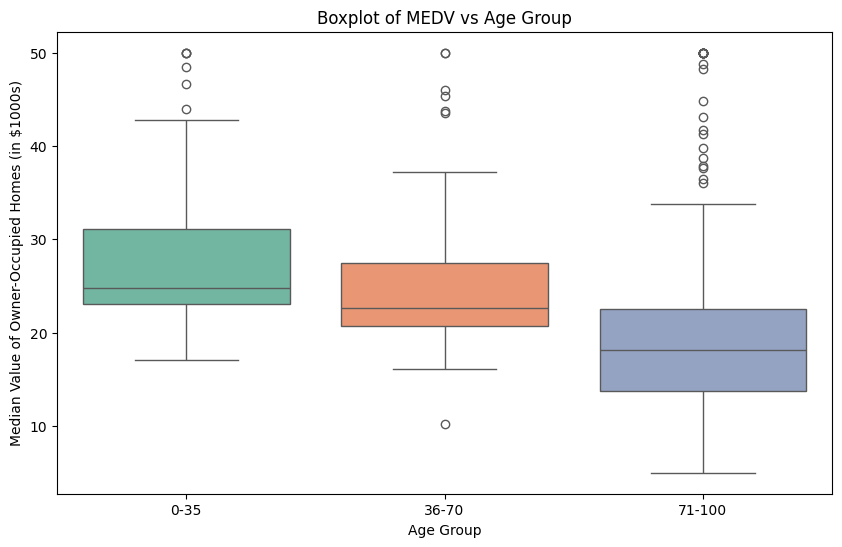

In [45]:
#  This boxplot shows the median value of owner-occupied homes (MEDV) across different age groups of the homes. 
#  It helps us see if there's a relationship between the age of homes and their median value.
# Discretize the AGE variable
boston_df['Age Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '36-70', '71-100'])
pyplot.figure(figsize=(10, 6))
palette = sns.color_palette("Set2", 3)
sns.boxplot(x=boston_df['Age Group'], y=boston_df['MEDV'], hue=boston_df['Age Group'], palette=palette)
pyplot.title('Boxplot of MEDV vs Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
pyplot.show()

#### Observations 
- **Youthful Appeal**: Homes in the 0-35 age group have the highest median values, reflecting the premium on newer constructions.
- **Middle Ground**: The 36-70 age group has a more consistent value range, balancing between newer and older properties.
- **Vintage Charm**: The 71-100 age group shows the lowest median values but includes high-value outliers, representing historic or unique properties.
- **Diverse Market Dynamics**: Newer homes (0-35 age group) exhibit a broad range of values, from entry-level to high-end, indicating a dynamic market.
- **Gradual Decline**: There is a gradual decline in median values as homes age, but valuable properties exist across all age groups.


## Scatter Plot for Nitric Oxide Concentrations (NOX) vs Proportion of Non-Retail Business Acres (INDUS)

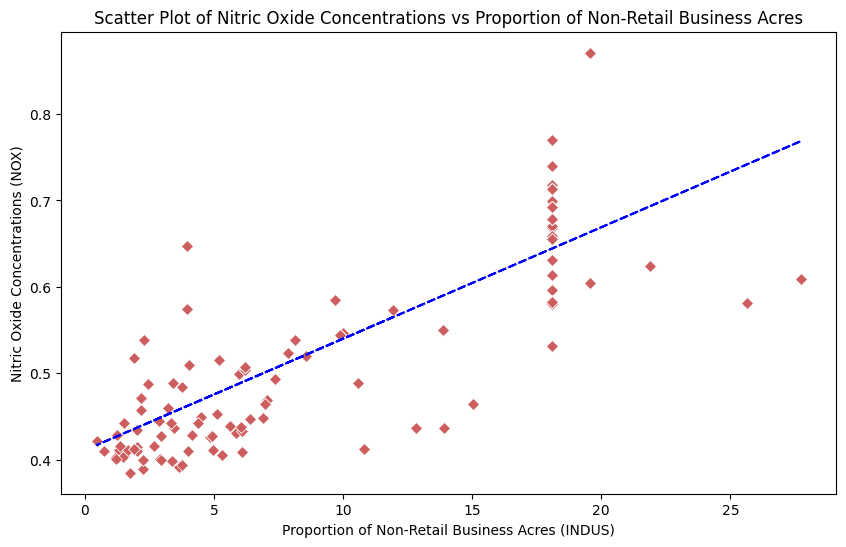

In [38]:
# Scatter plot for NOX vs INDUS
#  This scatter plot shows the relationship between the proportion of non-retail business acres per town (INDUS) and the nitric oxide concentrations (NOX). 
#  It helps us observe if there is any correlation between industrial activities and pollution levels. Typically, we might expect to see a positive correlation if industrial areas contribute to higher pollution.
import numpy as np

pyplot.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'], color='indianred', marker='D')

# Fit a linear regression model
z = np.polyfit(boston_df['INDUS'], boston_df['NOX'], 1)
p = np.poly1d(z)

# Plot the trend line
pyplot.plot(boston_df['INDUS'], p(boston_df['INDUS']), "b--")

# Customize the plot
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')

pyplot.show()

#### Observations
- **Positive Correlation**: There is a clear positive correlation between the proportion of non-retail business acres and nitric oxide (NOX) concentrations. As industrial land increases, NOX levels rise, indicating the environmental impact of industrial activities.
- **Low Industrial Use Clusters**: Data points clustering in the lower left indicate many areas with both low industrial use and low NOX levels, representing more residential or less industrialized zones.
- **Industrial Outliers**: Spikes in NOX concentrations around the 20% non-retail business acres mark highlight areas with intensive industrial activities and potentially higher pollution.
- **Variability in NOX Levels**: Even within similar proportions of industrial land use, NOX concentrations vary (e.g., at 5% non-retail business acres, NOX ranges from 0.4 to 0.6), suggesting other influencing factors like emission controls or proximity to traffic.
- **Environmental Impact**: The plot underscores the trade-offs between economic activities and environmental health, urging sustainable industrial practices.

## Histogram for the pupil to teacher ratio

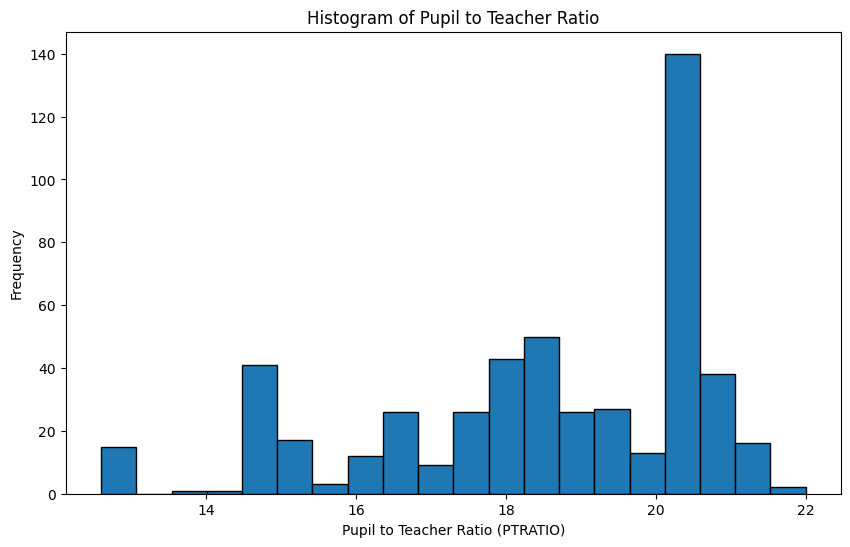

In [46]:
#  This histogram shows the distribution of the pupil to teacher ratio (PTRATIO) in the dataset. 
#  It helps us understand the spread and central tendency of this variable. Histograms are useful for visualizing the frequency distribution of a dataset.
pyplot.figure(figsize=(10, 6))
pyplot.hist(boston_df['PTRATIO'], bins=20, edgecolor='k')
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.show()

#### Observations

- **Range: 12.6 to 22**: The PTRATIO spans from 12.6 to 22, highlighting a broad range in pupil-teacher ratios. This variation captures both relatively low values (around 12.6 students per teacher) and higher values (up to 22 students per teacher), reflecting moderate diversity in class sizes across the dataset.

- **Most Common Ratios: Between 20 and 21**: A significant cluster of schools exhibits a pupil-teacher ratio around 20 - 21, suggesting this is a standard or typical ratio in the dataset, likely shaped by local educational policies or norms.

- **Absence of Outliers**: The dataset lacks extreme outliers, implying that pupil-teacher ratios fall within a predictable range. This consistency underscores a stable educational environment where no schools have exceptionally high or low ratios compared to the norm.

- **Skewness: Leftward Skew**: The histogram's leftward skew highlights a prevalence of lower pupil-teacher ratios, implying smaller class sizes are more common. This could be interpreted positively, as lower ratios often equate to more individualized student attention and potentially better educational outcomes.

- **Overall Interpretation**: The histogram suggests that while a pupil-teacher ratio of around 20 - 21 is typical, there is a noticeable inclination towards smaller class sizes. The distribution appears generally normal with a leftward skew, pointing to a majority of schools with favorable pupil-teacher ratios. The absence of outliers and moderate variability denote a consistent educational landscape, making this data valuable for shaping educational policies and resource allocation in the represented area.

## Is there a significant difference in median value of houses bounded by the Charles River or not?
### (T-test for independent samples)

### Independent Samples T-Test Analysis

**Research Question**: Does being adjacent to the Charles River influence the median house value?

#### Hypotheses:
- **Null Hypothesis (H0)**: The median house values for properties near the Charles River are not significantly different from those that are not.
- **Alternative Hypothesis (H1)**: There is a significant difference in the median house values for properties near the Charles River compared to those that are not.

#### Methodology:
Conduct an independent t-test to compare the two groups (houses near the Charles River vs. houses not near it).


T-Statistic: 3.996437466090509, P-Value: 7.390623170519905e-05
Mean value of houses near the Charles River: 28.44
Mean value of houses not near the Charles River: 22.09
Standard deviation of houses near the Charles River: 11.82
Standard deviation of houses not near the Charles River: 8.83


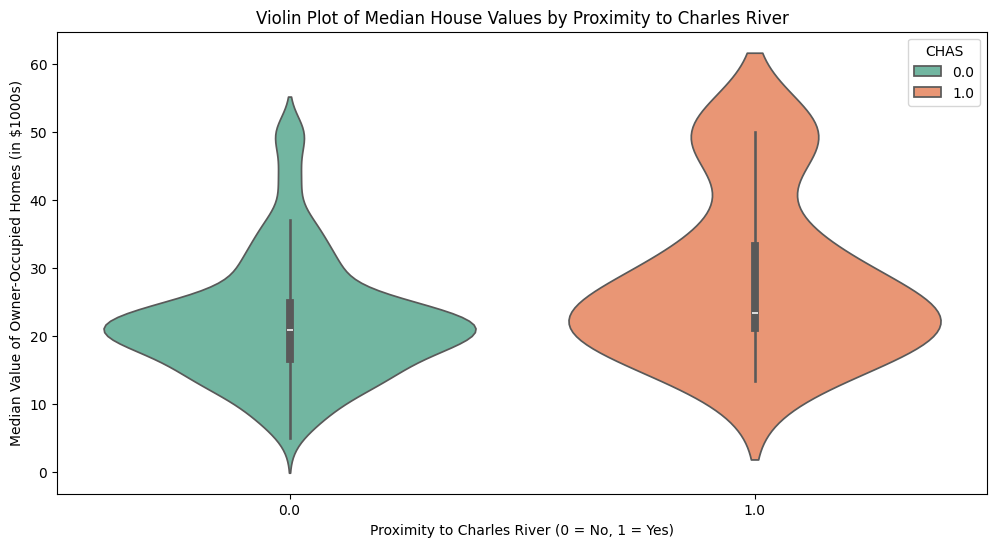

In [44]:
from scipy.stats import ttest_ind
# Separate the median values based on the Charles River variable
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test for independent samples
t_stat, p_value = ttest_ind(medv_river, medv_no_river)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Enhanced summary
mean_river = medv_river.mean()
mean_no_river = medv_no_river.mean()
std_river = medv_river.std()
std_no_river = medv_no_river.std()

print(f"Mean value of houses near the Charles River: {mean_river:.2f}")
print(f"Mean value of houses not near the Charles River: {mean_no_river:.2f}")
print(f"Standard deviation of houses near the Charles River: {std_river:.2f}")
print(f"Standard deviation of houses not near the Charles River: {std_no_river:.2f}")

# Visualization: Violin plot
pyplot.figure(figsize=(12, 6))
sns.violinplot(x='CHAS', y='MEDV', data=boston_df, hue=boston_df['CHAS'], palette="Set2")
pyplot.title('Violin Plot of Median House Values by Proximity to Charles River')
pyplot.xlabel('Proximity to Charles River (0 = No, 1 = Yes)')
pyplot.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
pyplot.show()


#### Test Results:
- **T-statistic**: 3.996437466090509
- **P-value**: 0.00007390623170519905

#### Conclusion:
- **Statistical Decision**: The p-value is significantly less than the alpha level of 0.05, leading us to reject the null hypothesis (H0).
- **Interpretation**: Rejecting the null hypothesis indicates a statistically significant difference in the median house values based on proximity to the Charles River.
- **Practical Implication**: Proximity to the Charles River significantly influences house values, likely due to the allure of waterfront locations and other location-specific advantages.
- **Caveats**: The t-test confirms a significant difference but does not specify which group has higher values or the extent of the difference. Further analysis is necessary to delve into these details. Additionally, statistical significance might not always translate into practical significance; it's essential to consider the real-world implications.

In summary, the t-test's low p-value suggests that proximity to the Charles River is statistically associated with variations in the median house values in the dataset.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

**Research Question:** Does the median value of houses (MEDV) differ based on the proportion of owner-occupied units built before 1940 (AGE)?

### Hypotheses:
- **Null Hypothesis (H0):** The median values of houses do not vary across different age groups.
- **Alternative Hypothesis (H1):** At least one age group shows a significant difference in the median house values.

### Method:
Conduct an Analysis of Variance (ANOVA) test to compare the means of MEDV among the age groups.

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Group '0-35' - Mean: 27.78, Std: 7.64
Group '36-70' - Mean: 24.95, Std: 6.97
Group '71-100' - Mean: 19.79, Std: 9.52


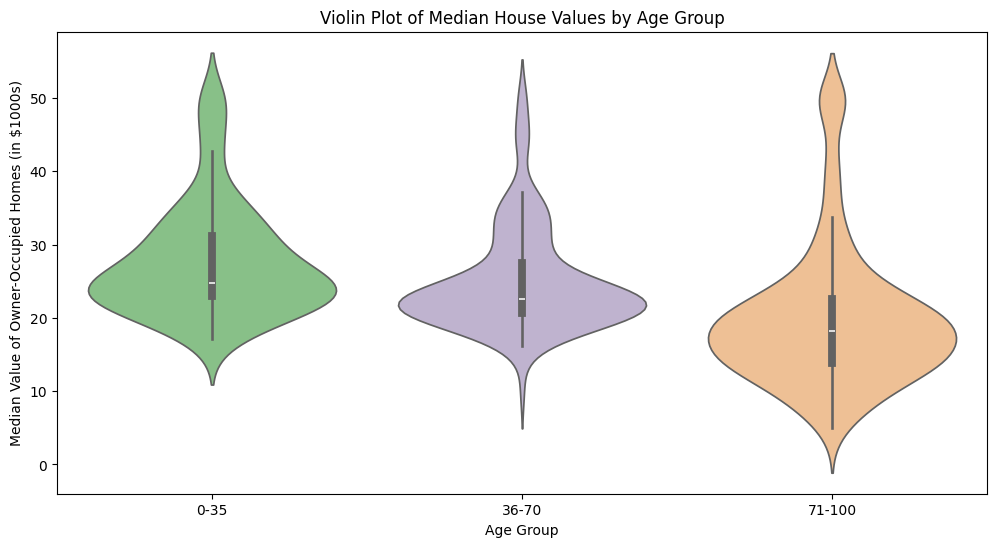

In [66]:
from scipy.stats import f_oneway

# Discretize the AGE variable
boston_df['Age Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '36-70', '71-100'])

# Separate the median values by age groups
medv_group1 = boston_df[boston_df['Age Group'] == '0-35']['MEDV']
medv_group2 = boston_df[boston_df['Age Group'] == '36-70']['MEDV']
medv_group3 = boston_df[boston_df['Age Group'] == '71-100']['MEDV']

# Perform the ANOVA test
f_stat, p_value = f_oneway(medv_group1, medv_group2, medv_group3)

print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Enhanced summary statistics
mean_group1 = medv_group1.mean()
mean_group2 = medv_group2.mean()
mean_group3 = medv_group3.mean()

std_group1 = medv_group1.std()
std_group2 = medv_group2.std()
std_group3 = medv_group3.std()

print(f"Group '0-35' - Mean: {mean_group1:.2f}, Std: {std_group1:.2f}")
print(f"Group '36-70' - Mean: {mean_group2:.2f}, Std: {std_group2:.2f}")
print(f"Group '71-100' - Mean: {mean_group3:.2f}, Std: {std_group3:.2f}")

# Visualization: Violin Plot
pyplot.figure(figsize=(12, 6))
sns.violinplot(x='Age Group', y='MEDV', data=boston_df, hue=boston_df['Age Group'], palette="Accent")
pyplot.title('Violin Plot of Median House Values by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
pyplot.show()

### ANOVA Test Insights

**Statistical Verdict**: The p-value derived from the ANOVA test stands at \(1.799 \times 10^{-15}\), which is far below the threshold of 0.05 (α = 0.05). Hence, we dismiss the null hypothesis (H0).

**Interpretation**: Rejecting the null hypothesis in this ANOVA context indicates that there are notable differences in the median house values (MEDV) across the age groups. This implies that at least one age group diverges significantly in terms of median house value.

**Practical Implications**: These findings highlight that the age of the houses (or the proportion of owner-occupied units built before 1940) plays a crucial role in influencing median house values. Various age groups exhibit differing median housing values, potentially due to factors such as the house condition, historical significance, modernization efforts, or other age-related aspects.

**Considerations**: Although the Analysis of Variance confirms a significant difference, it does not specify which groups differ. To identify specific group differences, a post-hoc analysis like Tukey's HSD (Honestly Significant Difference) test is necessary. Additionally, it's essential to account for other external variables that could affect house values and are not included in this analysis.

**Summary**: The exceptionally low p-value from the ANOVA test underscores a significant relationship between house age groups and their median values. The age of the houses emerges as a key factor in determining their value within the dataset, providing valuable insights for further analysis and decision-making.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Inquiry:** Is it feasible to assert that there's no connection between nitric oxide levels and the proportion of non-retail business acres within a town's limits?

### Hypotheses:
- **Null Hypothesis (H0):** There exists no discernible correlation between the concentrations of nitric oxide and the proportion of non-retail business acres in a town. In essence, variations in non-retail business acreage do not influence the levels of nitric oxide.
- **Alternative Hypothesis (H1):** A relationship does exist between nitric oxide concentrations and the proportion of non-retail business acres, indicating that changes in business acreage can impact nitric oxide levels.

### Testing Approach:
To investigate this relationship, we will utilize the Pearson correlation test. This statistical method will allow us to measure the strength and direction of the linear relationship between these two variables. The Pearson correlation coefficient, ranging from -1 to 1, will indicate the degree to which the two variables are related. A value close to 1 implies a strong positive relationship, while a value near -1 suggests a strong negative relationship. A value around 0 indicates no linear correlation.

By performing this test, we aim to determine whether fluctuations in the proportion of non-retail business acres are associated with corresponding changes in nitric oxide concentrations. The results will help us understand whether business acreage influences environmental pollution levels, providing insights into urban planning and environmental policies. Furthermore, the p-value obtained from the test will indicate the statistical significance of the findings, helping us decide whether to reject the null hypothesis in favor of the alternative hypothesis. If the p-value is less than the chosen significance level (typically 0.05), we will conclude that there is indeed a significant relationship between the two variables.

Pearson Correlation Coefficient: 0.76
P-Value: 7.9134e-98
The p-value is less than 0.05, indicating a statistically significant relationship between NOX and INDUS.
The positive correlation coefficient suggests that higher proportions of non-retail business acres are associated with higher nitric oxide concentrations.


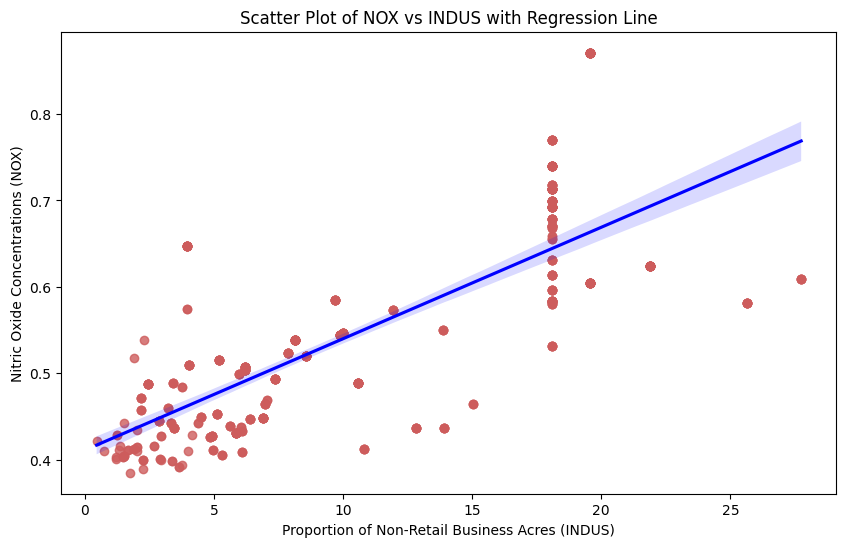

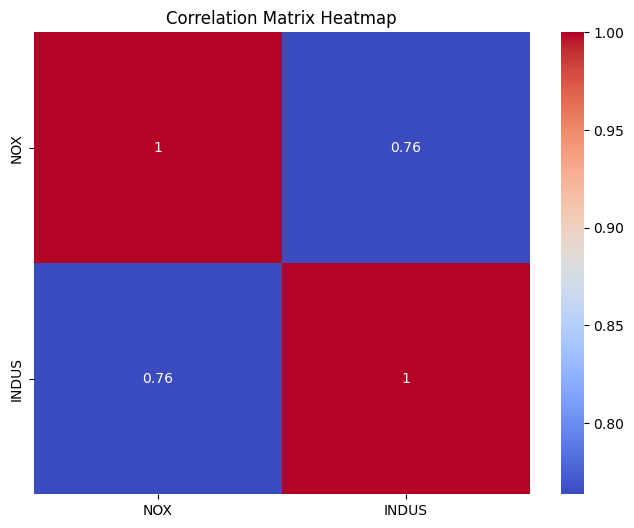


Descriptive Statistics:
              NOX       INDUS
count  506.000000  506.000000
mean     0.554695   11.136779
std      0.115878    6.860353
min      0.385000    0.460000
25%      0.449000    5.190000
50%      0.538000    9.690000
75%      0.624000   18.100000
max      0.871000   27.740000


In [68]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Enhanced print statements
print(f"Pearson Correlation Coefficient: {corr_coefficient:.2f}")
print(f"P-Value: {p_value:.4e}")

# Interpretation of the results
if p_value < 0.05:
    print("The p-value is less than 0.05, indicating a statistically significant relationship between NOX and INDUS.")
    if corr_coefficient > 0:
        print("The positive correlation coefficient suggests that higher proportions of non-retail business acres are associated with higher nitric oxide concentrations.")
    else:
        print("The negative correlation coefficient suggests that higher proportions of non-retail business acres are associated with lower nitric oxide concentrations.")
else:
    print("The p-value is greater than 0.05, indicating no statistically significant relationship between NOX and INDUS.")

# Visualization: Scatter plot with regression line
pyplot.figure(figsize=(10, 6))
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter_kws={'color':'indianred'}, line_kws={'color':'blue'})
pyplot.title('Scatter Plot of NOX vs INDUS with Regression Line')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()

# Visualization: Heatmap of the correlation matrix
pyplot.figure(figsize=(8, 6))
sns.heatmap(boston_df[['NOX', 'INDUS']].corr(), annot=True, cmap='coolwarm')
pyplot.title('Correlation Matrix Heatmap')
pyplot.show()

# Additional Descriptive Statistics
print("\nDescriptive Statistics:")
print(boston_df[['NOX', 'INDUS']].describe())


### Pearson Correlation Analysis Summary

**Statistical Decision**: The outcome of the Pearson correlation test is a p-value of 7.9134e-98, which is an extraordinarily minute value and decisively below the conventional significance threshold of 0.05 (α = 0.05). Consequently, we decisively reject the null hypothesis (H0).

**Interpretation**: By rejecting the null hypothesis within the context of a Pearson correlation test, we are asserting that there exists a statistically significant relationship between the concentrations of Nitric Oxide (NOX) and the proportion of non-retail business acres (INDUS). This finding is paramount as it highlights a discernible link between industrialization and pollution levels.

**Correlation Coefficient**: A correlation coefficient of 0.76 signifies a strong positive linear relationship between the two variables being analyzed. Here's a breakdown of what this means:
**Predictability**: A strong positive correlation implies that one variable can be a good predictor of the other. 

**Practical Implications**: The significant correlation unearthed by this test implies that areas with a higher proportion of non-retail business acreage, typically industrial zones, tend to have elevated levels of Nitric Oxide. This pollutant is often a byproduct of industrial activities, making this finding crucial for urban planning and public health policies. The results can guide policymakers in implementing strategies to mitigate pollution in industrial areas, ensuring better air quality and overall health outcomes for the population.

**Caveats**: It is imperative to remember that while the test identifies a significant correlation, it does not confirm causation. The observed relationship between Nitric Oxide concentrations and non-retail business acres might be influenced by other variables not accounted for in this analysis. Therefore, it is essential to conduct further studies to explore potential causal relationships and consider other confounding factors that might be at play.

**In Summary**: The exceptionally low p-value from the Pearson correlation test robustly indicates a significant association between NOX levels and the proportion of industrial land (INDUS) in the dataset. This suggests a noteworthy relationship between industrial activity and air pollution levels, particularly with respect to Nitric Oxide concentrations. This insight is invaluable for developing targeted interventions to reduce pollution and improve air quality in industrial regions, ultimately contributing to enhanced public health and environmental sustainability.

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)

**Research Query**: How does an increase in the weighted distance to the five key Boston employment centers influence the median value of owner-occupied homes?

### Hypotheses:
- **Null Hypothesis (H0)**: The weighted distances to employment centers do not affect the median value of homes. This means that any variations in the proximity of these employment centers have no bearing on the housing prices.
- **Alternative Hypothesis (H1)**: The weighted distances to employment centers do impact the median value of homes. In this case, changes in the distance to these key locations influence the housing market.

### Analytical Approach:
To explore this relationship, we will conduct a linear regression analysis. Here, the median value of owner-occupied homes (MEDV) will serve as the dependent variable, reflecting our primary outcome of interest. The weighted distance to the employment centers will be our independent variable, representing the predictor whose effect we aim to quantify.

In essence, this regression analysis will allow us to model the relationship between the distance to employment hubs and home values, providing a quantitative measure of how much the median house price changes with each unit increase in distance. This analysis not only helps in understanding the direct impact but also aids in making data-driven decisions in urban planning and real estate investment. We seek to determine whether proximity to employment centers is a significant factor in home valuation, potentially highlighting the importance of accessibility and convenience in the housing market. By performing this analysis, we aim to uncover insights that could shape future development strategies and guide stakeholders in optimizing the balance between residential comfort and economic access.

R-squared: 0.0625
Adjusted R-squared: 0.0606
F-statistic: 33.5796
F-statistic P-value: 1.2066e-08
Coefficients:
const    18.390088
DIS       1.091613
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        18:43:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

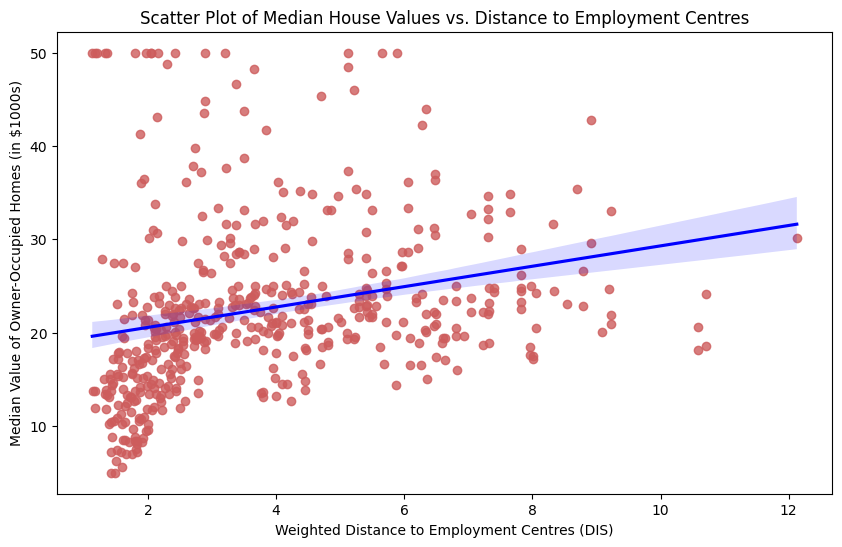

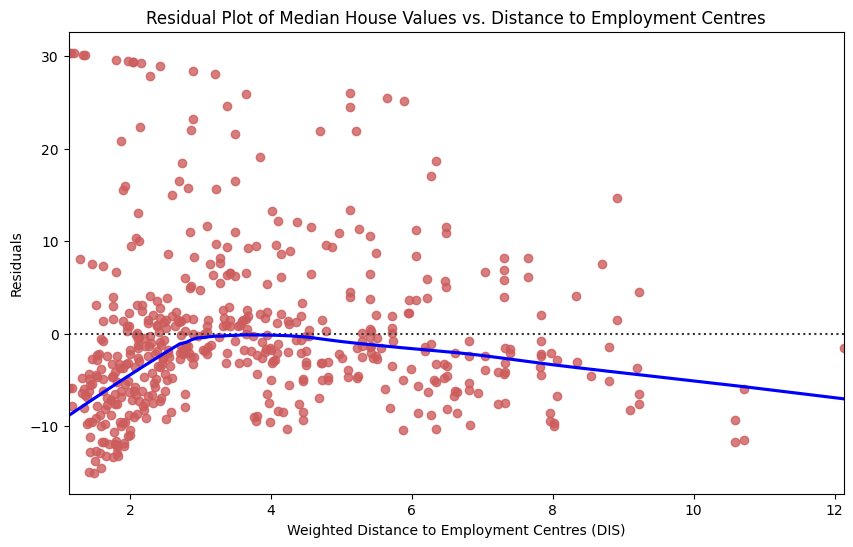

In [72]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Enhanced output: Extract important statistics
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
f_statistic = model.fvalue
p_value_f = model.f_pvalue
coefficients = model.params

print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")
print(f"F-statistic: {f_statistic:.4f}")
print(f"F-statistic P-value: {p_value_f:.4e}")
print(f"Coefficients:\n{coefficients}")
print(model.summary())

print("\n\n")

# Visualization: Scatter plot with regression line
pyplot.figure(figsize=(10, 6))
sns.regplot(x='DIS', y='MEDV', data=boston_df, scatter_kws={'color':'indianred'}, line_kws={'color':'blue'})
pyplot.title('Scatter Plot of Median House Values vs. Distance to Employment Centres')
pyplot.xlabel('Weighted Distance to Employment Centres (DIS)')
pyplot.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
pyplot.show()

# Visualization: Residual plot
pyplot.figure(figsize=(10, 6))
sns.residplot(x='DIS', y='MEDV', data=boston_df, lowess=True, scatter_kws={'color':'indianred'}, line_kws={'color':'blue'})
pyplot.title('Residual Plot of Median House Values vs. Distance to Employment Centres')
pyplot.xlabel('Weighted Distance to Employment Centres (DIS)')
pyplot.ylabel('Residuals')
pyplot.show()


### Key Insights:

#### Model Summary:
- **R-squared: 0.0625**: This indicates that approximately 6.25% of the variance in the median house values (MEDV) can be explained by the weighted distance to employment centers (DIS). While this is a low percentage, suggesting a weak explanatory power, it still highlights a certain degree of association.
  
- **Adjusted R-squared: 0.0606**: The adjusted R-squared accounts for the number of predictors in the model and slightly decreases the R-squared value. This value is also low, reinforcing that the distance to employment centers explains a modest portion of the variance in house prices.
  
- **F-statistic: 33.5796**: This value tests the overall significance of the model. A high F-statistic value relative to the number of observations suggests that the model provides a better fit than one with no predictors.
  
- **F-statistic P-value: 0.000000012066**: The extremely low p-value indicates that the regression model is statistically significant, meaning there is a significant relationship between the weighted distance to employment centers and median house values.

#### Coefficients:
- **Constant (Intercept): 18.390088**: This is the expected value of the dependent variable (MEDV) when the independent variable (DIS) is zero. It represents the baseline median house value when distance to employment centers is minimal.
  
- **DIS Coefficient: 1.091613**: This coefficient suggests that for each additional unit increase in the weighted distance to the employment centers, the median house value increases by approximately $1,091.61. This positive coefficient indicates that, contrary to what might be expected, houses tend to be valued higher when they are farther from employment centers. This could be due to various factors like suburban appeal, larger properties, or lower pollution levels.

### Practical Implications:
- **Urban Planning and Real Estate**: The results indicate that the distance to employment centers is a significant factor in determining house values, though it explains only a small portion of the variance. Urban planners and real estate developers can use this insight to understand the value dynamics in relation to distance from central employment hubs.
  
- **Residential Preferences**: The positive association might reflect a preference for residential areas that are farther from the hustle and bustle of employment centers, potentially offering quieter, more spacious living conditions.

### Caveats:
- **Weak Explanatory Power**: The low R-squared values suggest that there are many other factors influencing house prices that are not captured by this model. Thus, while distance to employment centers is significant, it is not a dominant factor.
  
- **Unexplored Variables**: Other variables such as proximity to schools, amenities, crime rates, and environmental quality could also play significant roles in determining house values and should be included in a more comprehensive model.


## Conclusions:
The statistical analysis of the Boston Housing dataset reveals that various factors, including proximity to employment centers and the age of houses, significantly impact median home values. While the distance to employment centers shows a modest explanatory power, indicating some preference for suburban areas, the age of houses and industrial acreage demonstrate more substantial influences, highlighting the importance of both historical charm and industrial development on housing prices.